In [0]:
import pylab
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Reshape,AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D, AveragePooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [58]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train_orig), (x_test, y_test_orig) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#LeNet
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.7165 - acc: 0.8161 - val_loss: 0.3480 - val_acc: 0.9046
Epoch 2/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.3215 - acc: 0.9085 - val_loss: 0.2719 - val_acc: 0.9242
Epoch 3/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.2619 - acc: 0.9254 - val_loss: 0.2276 - val_acc: 0.9364
Epoch 4/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.2248 - acc: 0.9356 - val_loss: 0.1980 - val_acc: 0.9436
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1984 - acc: 0.9437 - val_loss: 0.1766 - val_acc: 0.9502
Epoch 6/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1780 - acc: 0.9494 - val_loss: 0.1613 - val_acc: 0.9546
Epoch 7/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.1618 - acc: 0.9532 - val_loss: 0.1469 - val_acc

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.1858 - acc: 0.9422 - val_loss: 0.0594 - val_acc: 0.9815
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0330 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0343 - acc: 0.9894 - val_loss: 0.0304 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0256 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0196 - acc: 0.9940 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0264 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0119 - acc: 0.9964 - val_loss: 0.0266 - val_acc

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0441306339997132
Test accuracy: 0.9915


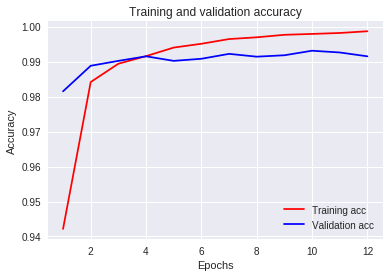

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
layers=[layer for layer in model.layers if layer.__class__.__name__=='Conv2D']
layer_outputs = [layer.output for layer in layers]
print(layer_outputs)
# Creates a model that will return these outputs, given the model input:
activation_model = Model(inputs=model.input, outputs=layer_outputs)

[<tf.Tensor 'conv_1/Relu:0' shape=(?, 26, 26, 32) dtype=float32>, <tf.Tensor 'conv_2/Relu:0' shape=(?, 11, 11, 64) dtype=float32>]


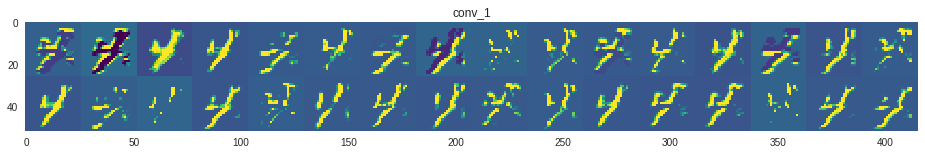

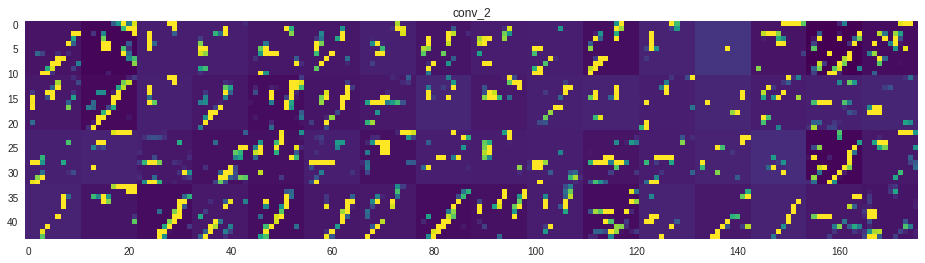

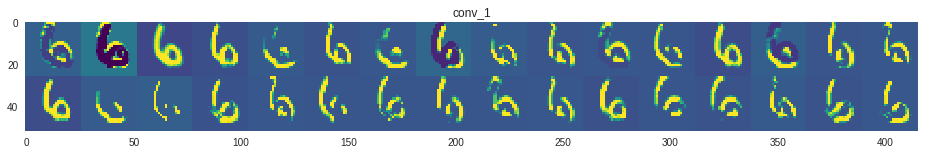

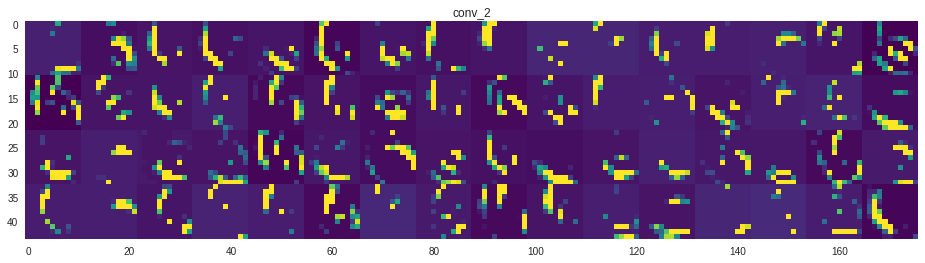

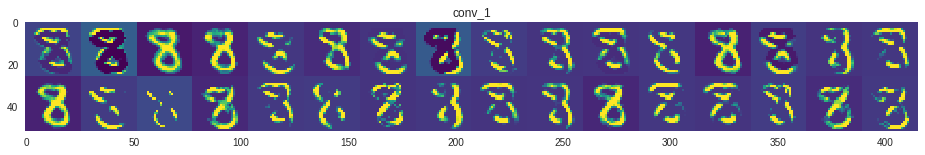

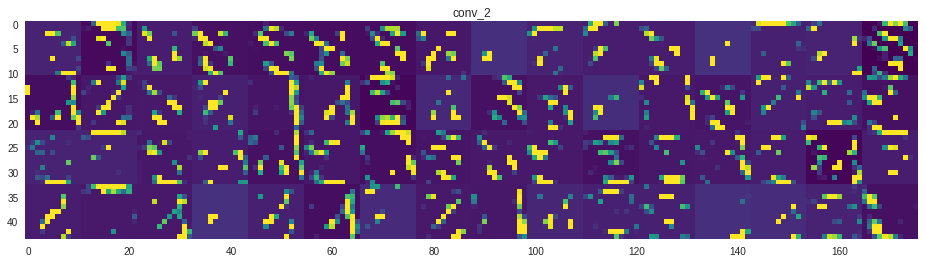

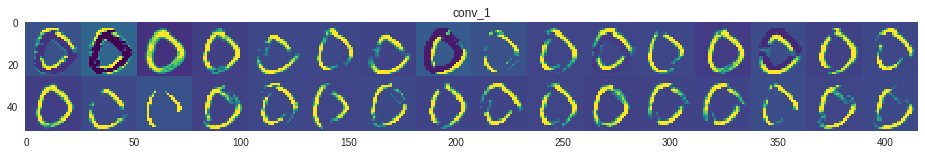

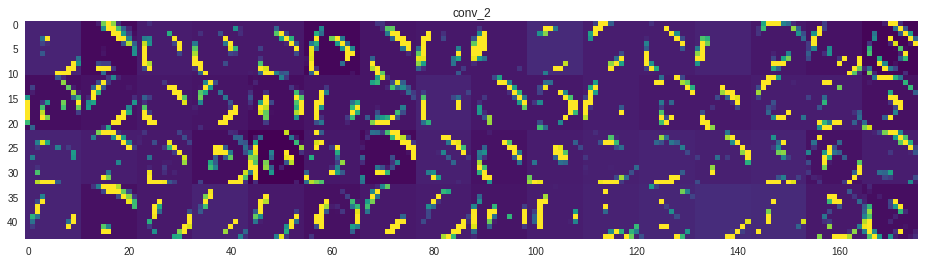

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


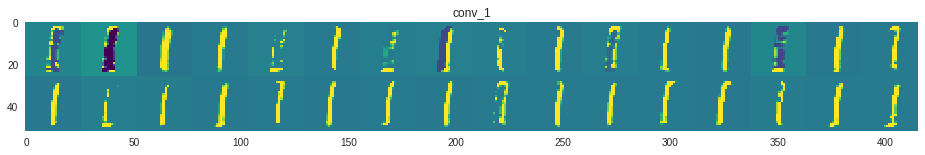

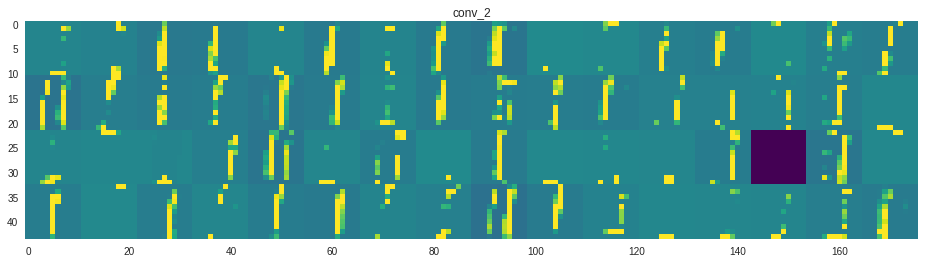

In [27]:

images_per_row = 16
for _ in range(5):
  img_tensor = np.expand_dims(x_test[np.random.choice(x_test.shape[0]),:], axis=0)
  activations = activation_model.predict(img_tensor)

  # Now let's display our feature maps
  for l, layer_activation in zip(layers, activations):
      #print(l.name)
      # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]

      # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

      # We will tile the activation channels in this matrix
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      #print(size,n_cols,n_features)

      # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(l.name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.3407 - acc: 0.9006 - val_loss: 0.1380 - val_acc: 0.9546
Epoch 2/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0966 - acc: 0.9698 - val_loss: 0.0675 - val_acc: 0.9781
Epoch 3/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0639 - acc: 0.9805 - val_loss: 0.0722 - val_acc: 0.9765
Epoch 4/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0485 - acc: 0.9847 - val_loss: 0.0499 - val_acc: 0.9835
Epoch 5/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0397 - acc: 0.9872 - val_loss: 0.0614 - val_acc: 0.9809
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.0502 - val_acc: 0.9848
Epoch 7/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0277 - acc: 0.9908 - val_loss: 0.0444 - val_acc

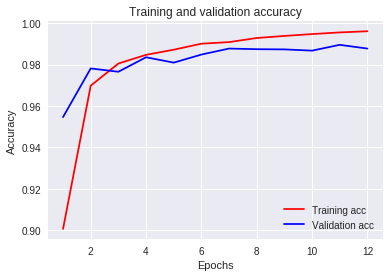

In [32]:
# Experiment 1

model = Sequential()
model.add(SeparableConv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.2021 - acc: 0.9409 - val_loss: 0.0652 - val_acc: 0.9782
Epoch 2/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0519 - acc: 0.9842 - val_loss: 0.0407 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0375 - acc: 0.9889 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0282 - acc: 0.9913 - val_loss: 0.0255 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0200 - acc: 0.9940 - val_loss: 0.0259 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0355 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0316 - val_acc

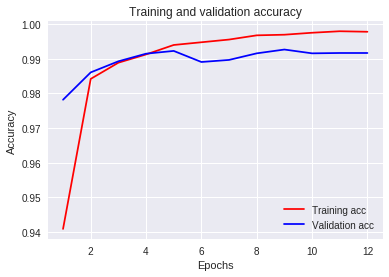

In [35]:
# Experiment 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 89us/step - loss: 1.9518 - acc: 0.4587 - val_loss: 0.7469 - val_acc: 0.8280
Epoch 2/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.4752 - acc: 0.8673 - val_loss: 0.3587 - val_acc: 0.8972
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.3398 - acc: 0.9000 - val_loss: 0.2967 - val_acc: 0.9114
Epoch 4/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.2909 - acc: 0.9144 - val_loss: 0.2839 - val_acc: 0.9144
Epoch 5/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.2581 - acc: 0.9232 - val_loss: 0.2295 - val_acc: 0.9315
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.2292 - acc: 0.9319 - val_loss: 0.2191 - val_acc: 0.9339
Epoch 7/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.2069 - acc: 0.9387 - val_loss: 0.1817 - val_acc

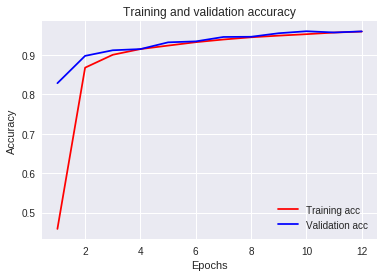

In [38]:
# Experiment 3

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 90us/step - loss: 1.1804 - acc: 0.6648 - val_loss: 0.3751 - val_acc: 0.8894
Epoch 2/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.3106 - acc: 0.9087 - val_loss: 0.2462 - val_acc: 0.9260
Epoch 3/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.2231 - acc: 0.9339 - val_loss: 0.1767 - val_acc: 0.9503
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.1747 - acc: 0.9475 - val_loss: 0.1378 - val_acc: 0.9604
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.1437 - acc: 0.9573 - val_loss: 0.1146 - val_acc: 0.9666
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.1237 - acc: 0.9635 - val_loss: 0.1057 - val_acc: 0.9683
Epoch 7/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.1101 - acc: 0.9667 - val_loss: 0.1012 - val_acc

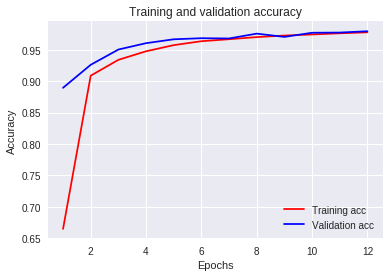

In [40]:
# Experiment 4

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.1966 - acc: 0.9385 - val_loss: 0.1026 - val_acc: 0.9670
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0563 - acc: 0.9824 - val_loss: 0.0392 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0384 - val_acc: 0.9871
Epoch 4/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.0407 - val_acc: 0.9868
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0217 - acc: 0.9935 - val_loss: 0.0333 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0162 - acc: 0.9950 - val_loss: 0.0273 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0352 - val_ac

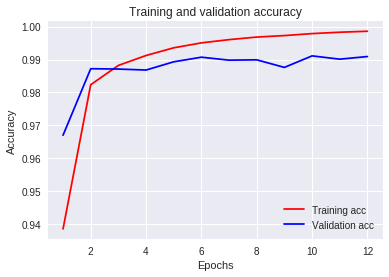

In [43]:
# Experiment 5

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.5405 - acc: 0.8447 - val_loss: 0.2579 - val_acc: 0.9215
Epoch 2/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.1961 - acc: 0.9406 - val_loss: 0.1503 - val_acc: 0.9527
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.1403 - acc: 0.9569 - val_loss: 0.1275 - val_acc: 0.9605
Epoch 4/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.1137 - acc: 0.9645 - val_loss: 0.1111 - val_acc: 0.9660
Epoch 5/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0985 - acc: 0.9694 - val_loss: 0.1046 - val_acc: 0.9685
Epoch 6/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0858 - acc: 0.9733 - val_loss: 0.0998 - val_acc: 0.9677
Epoch 7/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0769 - acc: 0.9756 - val_loss: 0.0915 - val_acc

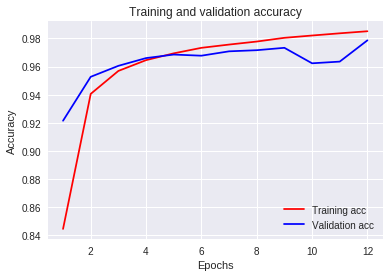

In [46]:
# Experiment 6

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(2,2),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), strides=(2,2), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.1973 - acc: 0.9388 - val_loss: 0.0496 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0532 - acc: 0.9831 - val_loss: 0.0356 - val_acc: 0.9887
Epoch 3/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0334 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0255 - acc: 0.9919 - val_loss: 0.0348 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0195 - acc: 0.9941 - val_loss: 0.0317 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0144 - acc: 0.9959 - val_loss: 0.0258 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 0.0293 - val_ac

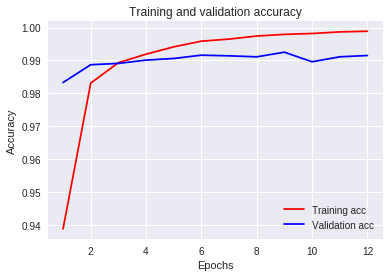

In [48]:
# Experiment 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.1987 - acc: 0.9406 - val_loss: 0.0657 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0572 - acc: 0.9828 - val_loss: 0.0341 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0327 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0312 - acc: 0.9900 - val_loss: 0.0256 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0242 - acc: 0.9926 - val_loss: 0.0276 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0283 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0156 - acc: 0.9950 - val_loss: 0.0256 - val_ac

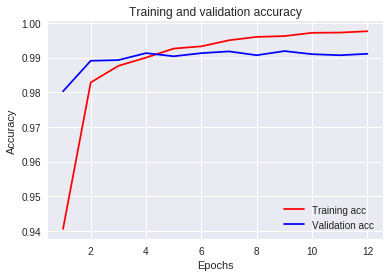

In [55]:
# Experiment 8

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.1915 - acc: 0.9447 - val_loss: 0.0565 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0521 - acc: 0.9833 - val_loss: 0.0414 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0344 - acc: 0.9892 - val_loss: 0.0319 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0262 - acc: 0.9912 - val_loss: 0.0323 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0318 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0162 - acc: 0.9946 - val_loss: 0.0284 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0236 - val_ac

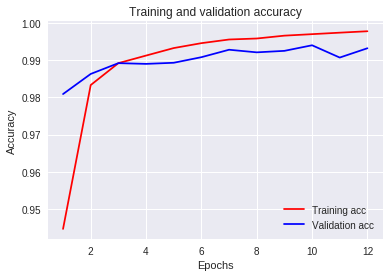

In [56]:
# Experiment 8

epochs = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()